In [47]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [34]:
# 0.
# a)
cars = sns.load_dataset('mpg')

cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [35]:
# a)
cars.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [36]:
# a)
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


In [37]:
# a)

cars["horsepower"].fillna(value=104, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_16432\2672267228.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars["horsepower"].fillna(value=104, inplace=True)


In [38]:
# b)

mpg = cars["mpg"]
hp = cars["horsepower"]
displacement = cars["displacement"]
cyl = cars["cylinders"]
weight = cars["weight"]
acceleration = cars["acceleration"]
hp.describe()

count    398.000000
mean     104.462312
std       38.199230
min       46.000000
25%       76.000000
50%       95.000000
75%      125.000000
max      230.000000
Name: horsepower, dtype: float64

[Text(0.5, 1.0, 'mpg vs hp'), Text(0.5, 0, 'mpg'), Text(0, 0.5, 'horsepower')]

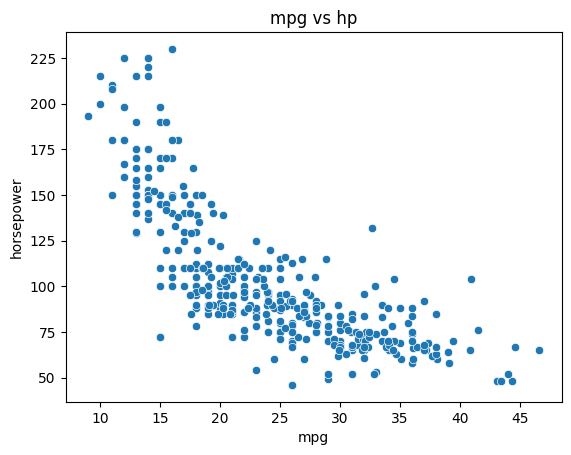

In [39]:
# c)

fig, ax = plt.subplots()
sns.scatterplot(data= cars, x='mpg', y='horsepower')
ax.set(title="mpg vs hp", xlabel='mpg', ylabel='horsepower')

[Text(0.5, 1.0, 'weight vs acceleration'),
 Text(0.5, 0, 'weight'),
 Text(0, 0.5, 'acceleration')]

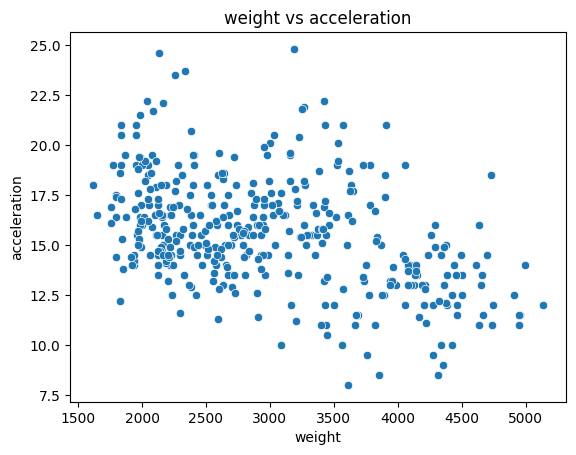

In [40]:
# c)

fig, ax = plt.subplots()
sns.scatterplot(data=cars, x='weight', y='acceleration')
ax.set(title="weight vs acceleration", xlabel='weight', ylabel='acceleration')

[Text(0.5, 1.0, 'displacement vs mpg'),
 Text(0.5, 0, 'displacement'),
 Text(0, 0.5, 'mpg')]

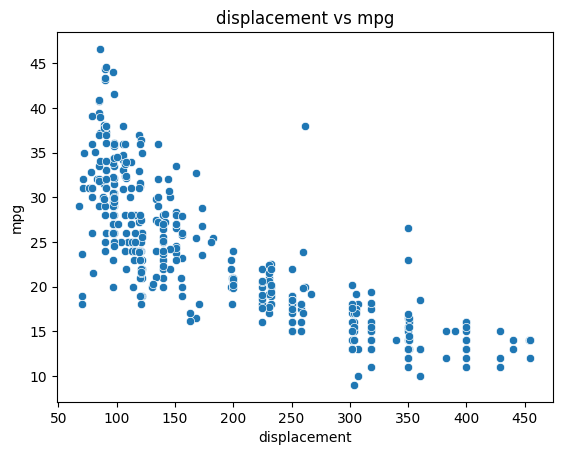

In [41]:
# c)

fig, ax = plt.subplots()
sns.scatterplot(data=cars, x="displacement", y='mpg')
ax.set(title='displacement vs mpg', xlabel='displacement', ylabel='mpg')

In [42]:
# d)

cars = cars.drop(["origin", "name"], axis='columns')

In [43]:
# 1. Train|test split

from sklearn.model_selection import train_test_split

X = cars.drop("mpg", axis=1)
y = cars["mpg"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (318, 6)
X_test shape:  (80, 6)
y_train shape:  (318,)
y_test shape:  (80,)


In [44]:
# 2. Function for evaluation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

def train_predict_eval(X_train, X_test, y_train, y_test, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    return mae, mse, rmse

linear_reg = LinearRegression()

mae, mse, rmse = train_predict_eval(X_train, X_test, y_train, y_test, linear_reg)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 2.467245254854016
Mean Squared Error: 9.440975071377764
Root Mean Squared Error: 3.072616974401099


In [48]:
# 3. 

# Linear Regression SVD
linear_reg_svd = LinearRegression()
mae_svd, mse_svd, rmse_svd = train_predict_eval(X_train, X_test, y_train, y_test, linear_reg_svd)

# Linear Regression SVD with scaled data (feature standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linear_reg_svd_scaled = LinearRegression()
mae_svd_scaled, mse_svd_scaled, rmse_svd_scaled = train_predict_eval(X_train_scaled, X_test_scaled, y_train, y_test, linear_reg_svd_scaled)

# Polynomial Linear Regression (degree 1)
linear_reg_poly1 = make_pipeline(PolynomialFeatures(degree=1), LinearRegression())
mae_poly1, mse_poly1, rmse_poly1 = train_predict_eval(X_train, X_test, y_train, y_test, linear_reg_poly1)

# Polynomial Linear Regression (degree 2)
linear_reg_poly2 = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
mae_poly2, mse_poly2, rmse_poly2 = train_predict_eval(X_train, X_test, y_train, y_test, linear_reg_poly2)

# Polynomial Linear Regression (degree 3)
linear_reg_poly3 = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
mae_poly3, mse_poly3, rmse_poly3 = train_predict_eval(X_train, X_test, y_train, y_test, linear_reg_poly3)

# Create a DataFrame
data = {
    "Model": ["Linear regr. SVD", "Linear regr. SVD scaled", "Polynom. regr. deg 1", "Polynom. regr. deg 2", "Polynom. regr. deg 3"],
    "MAE": [mae_svd, mae_svd_scaled, mae_poly1, mae_poly2, mae_poly3],
    "MSE": [mse_svd, mse_svd_scaled, mse_poly1, mse_poly2, mse_poly3],
    "RMSE": [rmse_svd, rmse_svd_scaled, rmse_poly1, rmse_poly2, rmse_poly3]
}

df = pd.DataFrame(data)

# Print the DataFrame
print(df)

                     Model       MAE        MSE      RMSE
0         Linear regr. SVD  2.467245   9.440975  3.072617
1  Linear regr. SVD scaled  2.467245   9.440975  3.072617
2     Polynom. regr. deg 1  2.467245   9.440975  3.072617
3     Polynom. regr. deg 2  1.962463   7.209400  2.685033
4     Polynom. regr. deg 3  2.250289  11.377064  3.372990
